In [1]:
import robotic as ry
import os
import time

In [ ]:
config = ry.Config()

In [3]:
print(os.getcwd())

/home/ulasdilek/lira/ulas


In [9]:
# for each *.g file in puzzles folder
for file in os.listdir("puzzles"):
    print("file: ", file)
    if file.endswith(".g") and file != "camera_top.g" and file != "camera_side.g":
        print("Saving: ", file)
        config.clear()
        config.addFile("puzzles/" + file)
        f = config.getFrame("camera_top")
        config.view()
        time.sleep(1.0)
        config.view_setCamera(f)
        time.sleep(0.5)
        config.view_savePng("saves/" + file)
        config.view_close()

file:  p1-two-blocks.g
Saving:  p1-two-blocks.g
-- WARNING:RenderData.cpp:glInitialize:105(-1) FreeType Error: Failed to load font 'ubuntu/Ubuntu-L.ttf' error code: 1 -> text rendering disabled
file:  p8-corner.g
Saving:  p8-corner.g
-- WARNING:RenderData.cpp:glInitialize:105(-1) FreeType Error: Failed to load font 'ubuntu/Ubuntu-L.ttf' error code: 1 -> text rendering disabled
file:  p2-maze-easy.g
Saving:  p2-maze-easy.g
-- WARNING:RenderData.cpp:glInitialize:105(-1) FreeType Error: Failed to load font 'ubuntu/Ubuntu-L.ttf' error code: 1 -> text rendering disabled
file:  p3-maze.g
Saving:  p3-maze.g
-- WARNING:RenderData.cpp:glInitialize:105(-1) FreeType Error: Failed to load font 'ubuntu/Ubuntu-L.ttf' error code: 1 -> text rendering disabled
file:  p4-four-blocks.g
Saving:  p4-four-blocks.g
-- WARNING:RenderData.cpp:glInitialize:105(-1) FreeType Error: Failed to load font 'ubuntu/Ubuntu-L.ttf' error code: 1 -> text rendering disabled
file:  p5-wall-easy.g
Saving:  p5-wall-easy.g
-- W

In [10]:
config.clear()
del config

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

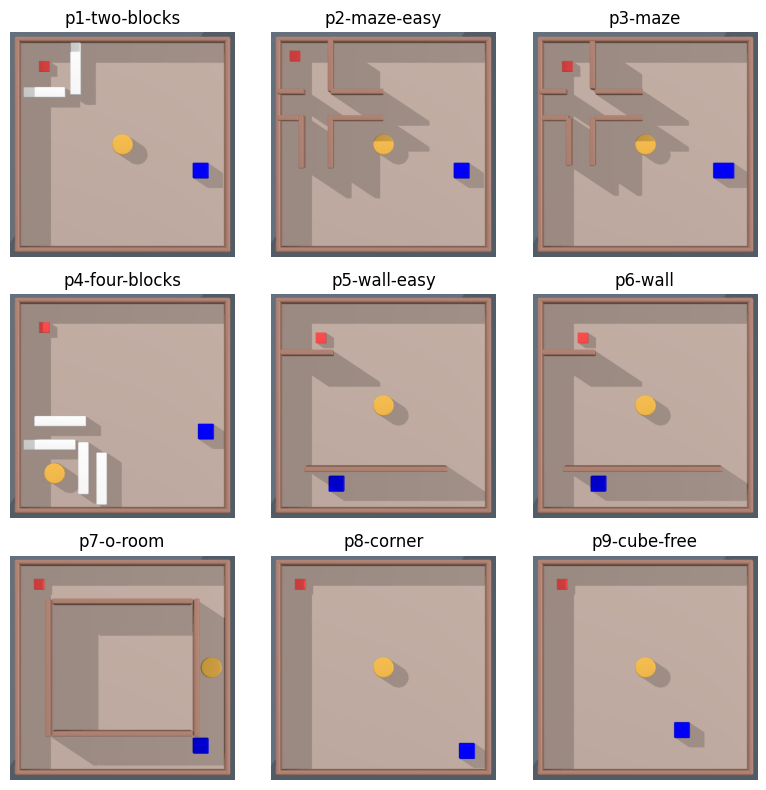

In [30]:
# Define the directory containing the images
image_dir = 'saves'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png')) if "base-walls-min" not in f]
image_files.sort()

# Create a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Loop through the images and plot them in the grid
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        img_path = os.path.join(image_dir, image_files[i])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(image_files[i].split('.')[0])
        ax.axis('off')
    else:
        ax.axis('off')

# Save the figure
plt.tight_layout()
plt.savefig("../interim_report/fig_01_puzzles.png")

# For interim report
Below is code to overlay wall direction information for `p9-cube-free` case 


In [19]:
from PIL import Image, ImageDraw, ImageFont

# Open your image
image = Image.open("saves/p9-cube-free.g0000.png")

# Initialize ImageDraw
draw = ImageDraw.Draw(image)

# Define the font size and load a default font
font_size = 56
try:
    font = ImageFont.truetype("times.ttf", font_size)  # times new roman
except IOError:
    font = ImageFont.load_default()

# Define the text and position for each wall
text_positions = {
    "N": (image.width // 2 - 10, 50 - font_size // 2),                    # Top (North)
    "E": (image.width - 70, image.height // 2 - font_size // 2),     # Right (East)
    "S": (image.width // 2 - 10, image.height - 60 - font_size // 2),     # Bottom (South)
    "W": (30, image.height // 2 - font_size // 2)                    # Left (West)
}

# Overlay text
for label, position in text_positions.items():
    draw.text(position, label, font=font, fill="black")  # Customize color if needed

# Save the modified image
image.save("saves/p9-cube-free-labeled.png")
image.show()